In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

from scipy.optimize import curve_fit

import time
import os

In [2]:
seed = np.random.RandomState()           
time_steps = int(1e5) 
# t0 = time.time()

explorations_per_graph=100

def LinearSearch(lys, element):
    for i in range(len(lys)):
        if lys[i] == element:
            return i
    return -1

#definisco una funzione del grafo per poi fare la media tra grafi differenti

def time_nodes (G, explorations_per_graph):
    initial_node = _random_subset(len(G.nodes), 1, seed).pop()
       
    #dinamica di esplorazione: semplicemente riempio una lista dei nuovi nodi in cui va il walker. Linear search 
    #mi guarda se il nodo è gia presente e non lo aggiunge. Exploration fa un evoluzione temporale restituendo il nuovo nodo
    
    def exploration(initial_node, G, explored_nodes):
        if LinearSearch(explored_nodes, initial_node) < 0:
               explored_nodes += [initial_node]
        neighbours = list(G[initial_node])
        new_node = _random_subset(neighbours, 1, seed).pop()
        return new_node

    exploration_time = []
    explored_nodes = []

    #ripeto l'esplorazione di "time_steps" passi temporali "exploration_per_graph" volte per fare una media - i tempi 
    #di esplorazione variano molto di volta in volta. Semplicemente ogni iterazione mi cambia il nodo iniziale con quello
    #nuovo chiamando la funzione esplorazione. Quando tutti i nodi sono esplorati salvo il tempo impiegato e svuoto il vettore
    #Infine faccio una media dei tempi.
    
    for i in range(explorations_per_graph):
        t = 0
        while True:
            initial_node = exploration(initial_node, G, explored_nodes)
            if len(explored_nodes) == len(G.nodes):
                exploration_time += [t]
             #  print("All nodes explored in ", t , "steps")
                explored_nodes.clear()
                break
            
            if t > time_steps:
                print(f"Exceeded {time_steps} iteration for network exploration")
                break
            t += 1

    mean_exploration_time = sum(exploration_time)/explorations_per_graph
    print("mean_exploration_time: ", mean_exploration_time, "for", len(G.nodes) ,"nodes")

    return mean_exploration_time
    
#print(exploration_time)
#print(explored_nodes) 
#print(len(explored_nodes),"Explored nodes")
     

# print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

Exploration for random graph

mean_exploration_time:  190.25 20 nodes
mean_exploration_time:  216.99 40 nodes
mean_exploration_time:  329.7 60 nodes
mean_exploration_time:  441.45 80 nodes
mean_exploration_time:  557.42 100 nodes
mean_exploration_time:  691.04 120 nodes
mean_exploration_time:  796.71 140 nodes
mean_exploration_time:  1025.22 160 nodes
mean_exploration_time:  1146.41 180 nodes
mean_exploration_time:  1229.7 200 nodes
mean_exploration_time:  1352.18 220 nodes
mean_exploration_time:  1559.53 240 nodes
mean_exploration_time:  1720.18 260 nodes
mean_exploration_time:  1799.19 280 nodes
mean_exploration_time:  2005.61 300 nodes
mean_exploration_time:  2084.13 320 nodes
mean_exploration_time:  2217.58 340 nodes
mean_exploration_time:  2362.77 360 nodes
mean_exploration_time:  2505.16 380 nodes
mean_exploration_time:  2695.85 400 nodes


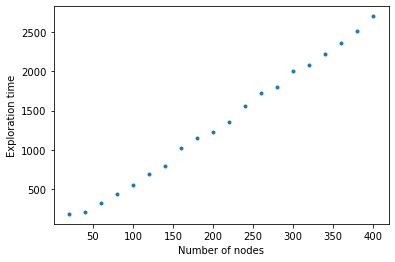

In [69]:
N = [20+i*20 for i in range(20)] #vettore dei nodi dei diversi grafi
P = 0.25
Times = []

#per ogni N creo un grafo e faccio una media dei tempi di esplorazione che plotto in funzione di N    
for i in range(len(N)):
    G = nx.erdos_renyi_graph(N[i], P)
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N[i], P)
    Times += [time_nodes(G, explorations_per_graph)]  

fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()


Exploration for scale-free graph

[  6.78834474 -79.19889474]


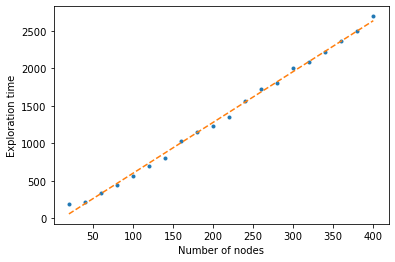

In [74]:
linear_fit=np.polyfit(N,Times,1)

print(linear_fit)

fit = [linear_fit[0]*n+linear_fit[1] for n in N]
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

ax.plot(N, fit, '--', label = 'fit')
plt.show()


mean_exploration_time:  38.85 10 nodes
mean_exploration_time:  120.05 20 nodes
mean_exploration_time:  199.07 30 nodes
mean_exploration_time:  309.54 40 nodes
mean_exploration_time:  410.09 50 nodes
mean_exploration_time:  486.56 60 nodes
mean_exploration_time:  665.48 70 nodes
mean_exploration_time:  766.92 80 nodes
mean_exploration_time:  880.12 90 nodes
mean_exploration_time:  974.17 100 nodes
mean_exploration_time:  1107.42 110 nodes
mean_exploration_time:  1302.78 120 nodes
mean_exploration_time:  1392.57 130 nodes
mean_exploration_time:  1562.05 140 nodes
mean_exploration_time:  1624.83 150 nodes
mean_exploration_time:  1738.31 160 nodes
mean_exploration_time:  1894.5 170 nodes
mean_exploration_time:  2140.19 180 nodes
mean_exploration_time:  2225.4 190 nodes
mean_exploration_time:  2380.61 200 nodes


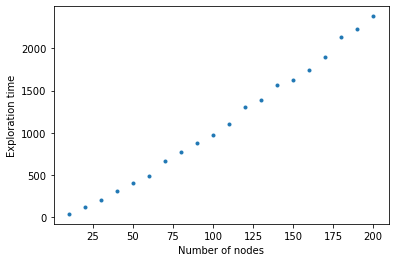

In [75]:
N = [10+i*10 for i in range(20)]
M = 3
Times = []

for i in range(len(N)):
    G = nx.barabasi_albert_graph(N[i], M)
    Times += [time_nodes(G,explorations_per_graph)]  

fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()

[  12.45608947 -196.91389474]


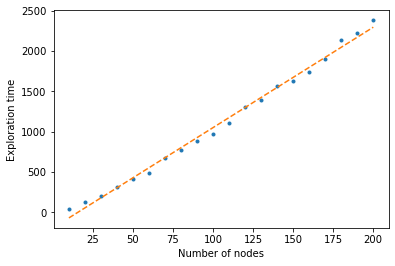

In [76]:
linear_fit=np.polyfit(N,Times,1)

print(linear_fit)

fit = [linear_fit[0]*n+linear_fit[1] for n in N]
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

ax.plot(N, fit, '--', label = 'fit')
plt.show()
